Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import date
import datetime as dt

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/umachidambaram/Aug-2021 Stock Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_curr_con.csv'),index_col = False )

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Index,Date,Open,High,Low,Close,Adj Close,Volume,country,Currency,High_con_currency
0,0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,528.690002
1,1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,527.210022
2,2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,527.840027
3,3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,531.119995
4,4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,532.070007


In [6]:
# Convert currency in the column Open to US Dollars 

def Open_con_currency(row):
    if row['country'] == 'United States':
        calc = row['Open']
        return calc
    elif row['country'] == 'China':
        calc = row['Open']*0.16
        return calc
    elif row['country'] == 'Canada':
        calc = row['Open']*0.8
        return calc
    elif row['country'] == 'India':
        calc = row['Open']*0.013
        return calc
    elif row['country'] == 'Switzerland':
        calc = row['Open']*1.08
        return calc
    elif row['country'] == 'Taiwan':
        calc = row['Open']*0.036
        return calc
    elif row['country'] == 'Africa':
        calc = row['Open']*0.067
        return calc
    elif row['country'] == 'Japan':
        calc = row['Open']*0.0089
        return calc
    elif row['country'] == 'Korea':
        calc = row['Open']*0.00084
        return calc
    else: return '0'

In [7]:
df['Open_con_currency'] =df.apply(Open_con_currency, axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,Index,Date,Open,High,Low,Close,Adj Close,Volume,country,Currency,High_con_currency,Open_con_currency
0,0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,528.690002,528.690002
1,1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,527.210022,527.210022
2,2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,527.840027,527.840027
3,3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,531.119995,531.119995
4,4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,532.070007,532.070007


In [8]:
# Convert the High (currency converted column) to float from object

df.Open_con_currency = df.Open_con_currency.astype(float)
df.High_con_currency = df.High_con_currency.astype(float)

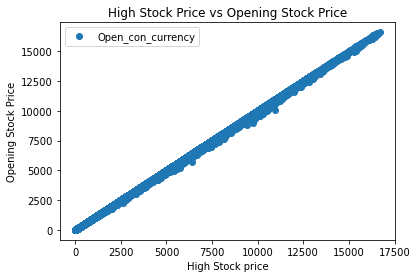

In [9]:
# Create a scatterplot using matplotlib of High Stock price vs Opening Stock Price.

df.plot(x = 'High_con_currency', y='Open_con_currency',style='o') 
plt.title('High Stock Price vs Opening Stock Price')  
plt.xlabel('High Stock price')  
plt.ylabel('Opening Stock Price')  
plt.show()

Hypothesis:
There is a strong positive relation between High Stock Price and Opening Stock Price.

In [10]:
# Create Year column (can be used if need to get a subset of recent stock data.)

df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Unnamed: 0,Unnamed: 0.1,Index,Date,Open,High,Low,Close,Adj Close,Volume,country,Currency,High_con_currency,Open_con_currency,Year
0,0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,528.690002,528.690002,1965
1,1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,527.210022,527.210022,1966
2,2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,527.840027,527.840027,1966
3,3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,531.119995,531.119995,1966
4,4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,532.070007,532.070007,1966


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open_con_currency', ylabel='Density'>

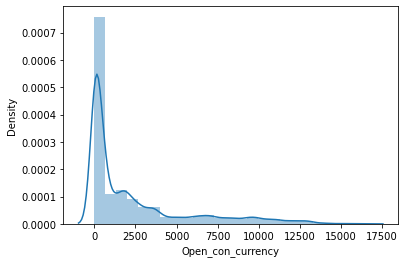

In [17]:
sns.distplot(df['Open_con_currency'], bins=25) # Shows extreme values

In [18]:
df['Open_con_currency'].mean() # Check the mean

2323.6186172793496

In [19]:
df['Open_con_currency'].median() # Check the median

651.2112108800001

In [20]:
df['Open_con_currency'].max() # Check the max

16590.42969

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Open_con_currency'].values.reshape(-1,1)
y = df['High_con_currency'].values.reshape(-1,1)

In [22]:
X

array([[528.690002  ],
       [527.210022  ],
       [527.840027  ],
       ...,
       [ 16.32903943],
       [ 16.3099298 ],
       [ 16.36036987]])

In [24]:
y

array([[528.690002  ],
       [527.210022  ],
       [527.840027  ],
       ...,
       [ 16.36544006],
       [ 16.45358044],
       [ 16.42822949]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Create a regression object.

regression = LinearRegression()

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

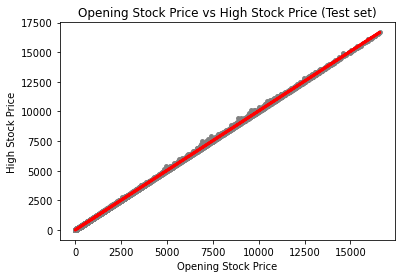

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Opening Stock Price vs High Stock Price (Test set)')
plot_test.xlabel('Opening Stock Price')
plot_test.ylabel('High Stock Price')
plot_test.show()

The linear regression line is a very good fit to the data.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.00491133]]
Mean squared error:  533.9576389942802
R2 score:  0.999951238971383


Root mean squared error being 534 means the regression may not be the best model.
With r^2 of almost a 1, this is a great fit.

In [32]:
y_predicted

array([[1.60958821e+03],
       [1.58360372e+02],
       [7.79287046e+02],
       ...,
       [9.58330870e-01],
       [3.35165421e+03],
       [1.04046915e+03]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1607.817656,1609.588206
1,162.312838,158.360372
2,774.760000,779.287046
3,9209.009766,9176.723246
4,453.799988,455.479715
5,1670.767970,1674.847932
6,8.775650,9.757094
7,8533.620000,8514.627443
8,53.748704,54.971012
9,4481.519922,4494.921814


In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.00491133]]
Mean squared error:  575.7556247419562
R2 score:  0.9999466067131125


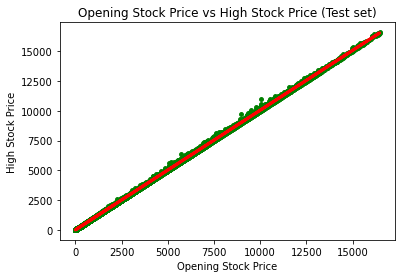

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Opening Stock Price vs High Stock Price (Test set)')
plot_test.xlabel('Opening Stock Price')
plot_test.ylabel('High Stock Price')
plot_test.show()

With an r^2 value of almost and the actual values and predicted values so close, the model performed good. The data is also linear with a slope of 1.

Since data was collected from yahoo finance, stock data from various countries and is from a reliable source kaggle there appears to be no bias. 

In [38]:
# 13. Export df to Prepared Data folder

df.to_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_regression.csv'))